# Making initial imports

In [1]:
#!pip install langdetect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# NLP library imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/laks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/laks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading data scrapped on TrustPilot

The dataframe is  composed with the comments scraped on Trustpolit at [this page](https://fr.trustpilot.com/review/www.centerparcs.fr/fr-fr).

In [44]:
df2 = pd.read_json('session_3_notebook_1.json')
df1 = pd.read_json('don4_us.json')

#df_perso = pd.read_json('tripadvisor2.json')
#df_perso2 = pd.read_json('tripadvisor.json')
#df_perso

df = df1.copy()
df = df.drop(["hotel_adress","hotel_type","image_url","locid","pid","price_range","review_id","reviewer_id","trip_type"], axis = 1)
df2.head()

,content,date,name,stars,title
0,\n Nous avons passé un excellent we...,2018-11-22 17:23:07,\n Cor Boonen\n,4,Week-end
1,"\n Parc très agréable, difficile de...",2018-08-08 07:52:09,\n Alain \n,3,Les TROIS FORETS
2,"\n Pas grand chose ne marche, ni l’...",2018-05-12 10:02:58,\n Manuele Civico\n,1,Pas grand chose ne marche !
3,\n Moi je vais parler aujourd'hui ...,2017-09-15 11:17:50,\n Sophie Duhamel\n,1,Non professionnel
4,"\n calme, reposant, confortable, dé...",2016-10-11 07:54:28,\n jerome\n,5,bon séjour


In [4]:
df = pd.read_csv('clean_data_gr4.csv',index_col=0)
df.head()

,hotel_name,published_date,rating,review,review_language,title,trip_date,tokens,Stemming,Lemmatisation
0,Center Parcs Le Bois aux Daims,1 février 2019,5,Premier séjour à center parc pour nous et nous...,fr,Petite semaine en famille,janvier 2019,"['premier', 'adore', 'partis', 'petite', 'fill...","['premier', 'adore', 'partis', 'petite', 'fill...","['premi', 'ador', 'part', 'petit', 'fill', 'pa..."
1,Center Parcs Le Bois aux Daims,1 février 2019,5,sejour très agreable comme d habitude a center...,fr,center parcs la promesse des daims,janvier 2019,"['agreable', 'habitude', 'quel', 'plaisir', 't...","['agreable', 'habitude', 'quel', 'plaisir', 't...","['agreabl', 'habitud', 'quel', 'plais', 'terr'..."
2,Center Parcs Le Bois aux Daims,1 février 2019,3,"Cottage très bien, propre et chaud dès l'arriv...",fr,A améliorer,janvier 2019,"['bien', 'propre', 'chaud', 'des', 'l arrivee'...","['bien', 'propre', 'chaud', 'de', 'l arrivee',...","['bien', 'propr', 'chaud', 'de', 'l arrive', '..."
3,Center Parcs Le Bois aux Daims,1 février 2019,3,Séjour très reposant à noter tout de même troi...,fr,Reposant,février 2019,"['reposant', 'noter', 'trois', 'restaurants', ...","['reposant', 'noter', 'trois', 'restaurant', '...","['repos', 'not', 'trois', 'restaur', 'test', '..."
4,Center Parcs Le Bois aux Daims,2 février 2019,5,Arrivés pour trois nuits et deux jours en sema...,fr,tres belle decouverte,janvier 2019,"['arrives', 'trois', 'nuits', 'deux', 'hors', ...","['arrive', 'trois', 'nuits', 'deux', 'hors', '...","['arriv', 'trois', 'nuit', 'deux', 'hor', 'sai..."


# Shapping dataFrame

**Making some modifications from raw data**

In [46]:
# Setting date as index
df.set_index('published_date', inplace = True)

#  Displaying result
df.head()

KeyError: 'published_date'

# Exploratory Data Analysis

In [48]:
# Even if not really useful for this case, a good habit is to start with df.describe() and df.info() when you start working on a dataFrame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, September 26, 2018 to July 25, 2015
Data columns (total 6 columns):
hotel_name         208 non-null object
rating             208 non-null int64
review             208 non-null object
review_language    208 non-null object
title              208 non-null object
trip_date          208 non-null object
dtypes: int64(1), object(5)
memory usage: 11.4+ KB


,rating
count,208.000000
mean,4.028846
std,1.006805
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


**Studying eventual doubles**

- We're here looking at names which are pseudos. Be careful, differents people could use the same ones. The date is a good indicator to know if the same person let 2 comments.

In [21]:
print('Number of comments', df.name.count())
print('Number of unique names: ', df.name.nunique())

double = df.name.value_counts().index.tolist()[:sum(df.name.value_counts()>=2)]
print(double)
for name in double:
    print('\n',name)
    date_double = df[df.name==name].date.tolist()
    row_double = df[df.name==name].index.tolist()
    content_double = df[df.name==name].content.tolist()
    [print(date,row,content) for date,row,content in zip(date_double,row_double,content_double)]

Number of comments 304
Number of unique names:  300
['\n            Nathalie\n        ', '\n            Client\n        ', '\n            MATHIEU\n        ', '\n            PELTIER\n        ']

 
            Nathalie
        
2016-03-03 22:35:40 252 
            Cottage confortable, bien agencé, bien équipé notamment la cuisine. Les enfants ont adoré la baignoire!
2016-03-03 20:51:45 262 
            Parfait pour les familles
        

 
            Client
        
2016-04-16 17:02:59 28 
            Séjour sympathique. Le seul bémol est sur le cottage. La propreté et l'entretien laisse à désirer.
        
2016-03-04 12:18:38 223 
            Nous sommes partis avec 6 enfants entre 13 et 2 ans et tout le monde a trouvé son compte : aquamundo, mini-ferme, confort dans notre cottage...
        

 
            MATHIEU
        
2016-03-11 14:25:14 152 
            WEEK END du 19/02/2016 au 22/02/2016. 
2016-03-03 20:16:37 263 
            Un week inoubliable avec nos 3 enfants dont un bébé

You might find interesting things in your dataset. 

For example it is fun here to see **Peltier**'s comments and how he changed is mind:

- April 14th 13:41 : "formule intéressante pour de courtes vacances"
- April 14th 20:33 : "pas de réseau et deux chaines tv manquantes" 



**Rapid overview of global rating**


Average rating is : 3.68


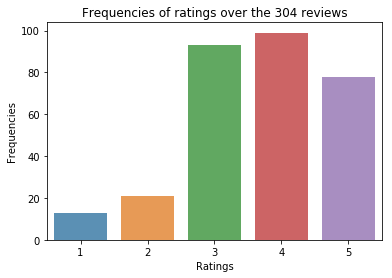

In [22]:
# Average rating value
print('Average rating is : {}'.format(round(df.stars.mean(),2)))

# Plotting rating distribution
X_ratings = df.stars.value_counts()
ax = sns.barplot(X_ratings.index,X_ratings,alpha=0.8)
ax.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(df.shape[0]))
plt.show()

**Distribution of comments length**

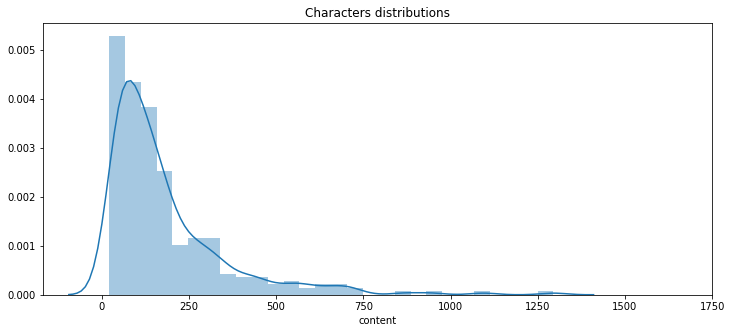

In [23]:
# Making the plot
x = plt.figure(figsize=(12,5))
sns.distplot(df['content'].apply(len))
plt.title('Characters distributions')
plt.xticks(range(0,2000,250))
plt.show()

In [24]:
# Repartition of reviews dates
df['content'].resample('M').count().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

# Pre-Processing 1 : Filters for punctuation and specific characters

In [1]:
df = pd.read_csv()
df.head()

NameError: name 'df' is not defined

In [5]:
# creating a list with all reviews
all_reviews = df.review.tolist()

In [8]:
# transformating comments into lower-case text 
lower_reviews = [review.lower() for review in all_reviews]

In [11]:
# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":","\u2019t","\\u00b0"]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [review.translate(str.maketrans(transformation_dict)) for review in lower_reviews]

ValueError: string keys in translate table must be of length 1

In [12]:
# removing accent
with_accent = ['é', 'è', 'à','ù','ï','ö','û','ê','ü','î','\\u00e7','\\u00c0']
without_accent = ['e', 'e', 'a','u','i','o','u','e','u','i','c','a']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_reviews]

NameError: name 'no_punctuation_reviews' is not defined

In [49]:
# Displaying some results 
for i in range(5):
    print(all_reviews[i])
    print(no_accent_reviews[i])
    print('\n')

Plenty to do for amusement. Paying activities a bit expensive. The cleaning of the cottages leaves a lot to be desired, and needs to be improved,  but overall a super weekend. The electric car was well worth it and added to our enjoyment
plenty to do for amusement  paying activities a bit expensive  the cleaning of the cottages leaves a lot to be desired  and needs to be improved   but overall a super weekend  the electric car was well worth it and added to our enjoyment


Nice place to relax, The park is quiet and green although a little barren in places as it seems quite new. Poor food quality and offering at relatively high prices (est. 30\u20ac/person for supermarket-type food), short beds (2m), WiFi overpriced at 40\u20ac/week, spacious new-ish bungalows though, fairly clean if you don\u2019t count spiderwebs and dusty walls. Did enjoy it tho, won\u2019t go back here
nice place to relax  the park is quiet and green although a little barren in places as it seems quite new  poor foo

In [50]:
def number_of_unique_words(list_of_reviews):
  
    # Concatenating all reviews from the list
    all_words = ''.join(list_of_reviews)

    # Tokenizing
    unique_tokens = set(word_tokenize(all_words))
  
    # Returning length of list
    return len(unique_tokens)

In [51]:
print(number_of_unique_words(all_reviews))

5780


In [52]:
print(number_of_unique_words(lower_reviews))

5247


In [53]:
print(number_of_unique_words(no_punctuation_reviews))

4568


In [54]:
print(number_of_unique_words(no_accent_reviews))

4568


# Pre-processing 2 : Tokenization

**Doing it in two different ways**

In [59]:
# Using regular expression
tokenized_reviews_re = [re.split('\s+', review) for review in no_accent_reviews]

In [60]:
# using NLP libraries
tokenized_reviews_nltk = [word_tokenize(review) for review in no_accent_reviews]
tokenized_reviews_nltk

[['plenty',
  'to',
  'do',
  'for',
  'amusement',
  'paying',
  'activities',
  'a',
  'bit',
  'expensive',
  'the',
  'cleaning',
  'of',
  'the',
  'cottages',
  'leaves',
  'a',
  'lot',
  'to',
  'be',
  'desired',
  'and',
  'needs',
  'to',
  'be',
  'improved',
  'but',
  'overall',
  'a',
  'super',
  'weekend',
  'the',
  'electric',
  'car',
  'was',
  'well',
  'worth',
  'it',
  'and',
  'added',
  'to',
  'our',
  'enjoyment'],
 ['nice',
  'place',
  'to',
  'relax',
  'the',
  'park',
  'is',
  'quiet',
  'and',
  'green',
  'although',
  'a',
  'little',
  'barren',
  'in',
  'places',
  'as',
  'it',
  'seems',
  'quite',
  'new',
  'poor',
  'food',
  'quality',
  'and',
  'offering',
  'at',
  'relatively',
  'high',
  'prices',
  'est',
  '30\\u20ac',
  'person',
  'for',
  'supermarket',
  'type',
  'food',
  'short',
  'beds',
  '2m',
  'wifi',
  'overpriced',
  'at',
  '40\\u20ac',
  'week',
  'spacious',
  'new',
  'ish',
  'bungalows',
  'though',
  'fairly',

**And making a comparison of results**

In [58]:
# Making a comparison between both of them
print("With NLTK  library : {}".format(len(tokenized_reviews_nltk)))
print("With RegEx library : {}".format(len(tokenized_reviews_re)))

With NLTK  library : 208
With RegEx library : 208


**Try to analyze the next lines of code and to understand the difference between both of them**

Here is an original review

In [45]:
# Choosing a review to inspect
n_review = 10
print(all_reviews[n_review])


            pdt les vacances scolaires, sans la riviere sauvage et avec seulement 2 toboggans accessibles a moins d 1,4m beaucoup de queue et d'attente ( un seul en plus pour les plus grands) , peu de diversité du coup et l'ennui arrive inevitablement. Un  bowling? il reste de la place a midi, super! on prendra des tapas!... NON ils sont sur la carte mais non dispos... assiette de charcuterie?? NON plus ... donc rien a manger du coup, après la séance: plus de 30 min de queue avant de pouvoir commander une pizza... on avait vraiment faim.:-(


And here are the tokenized ones

In [46]:
print(tokenized_reviews_nltk[n_review])

['pdt', 'les', 'vacances', 'scolaires', 'sans', 'la', 'riviere', 'sauvage', 'et', 'avec', 'seulement', '2', 'toboggans', 'accessibles', 'a', 'moins', 'd', '1', '4m', 'beaucoup', 'de', 'queue', 'et', 'd', 'attente', 'un', 'seul', 'en', 'plus', 'pour', 'les', 'plus', 'grands', 'peu', 'de', 'diversite', 'du', 'coup', 'et', 'l', 'ennui', 'arrive', 'inevitablement', 'un', 'bowling', 'il', 'reste', 'de', 'la', 'place', 'a', 'midi', 'super', 'on', 'prendra', 'des', 'tapas', 'non', 'ils', 'sont', 'sur', 'la', 'carte', 'mais', 'non', 'dispos', 'assiette', 'de', 'charcuterie', 'non', 'plus', 'donc', 'rien', 'a', 'manger', 'du', 'coup', 'apres', 'la', 'seance', 'plus', 'de', '30', 'min', 'de', 'queue', 'avant', 'de', 'pouvoir', 'commander', 'une', 'pizza', 'on', 'avait', 'vraiment', 'faim']


In [47]:
print(tokenized_reviews_re[n_review])

['', 'pdt', 'les', 'vacances', 'scolaires', 'sans', 'la', 'riviere', 'sauvage', 'et', 'avec', 'seulement', '2', 'toboggans', 'accessibles', 'a', 'moins', 'd', '1', '4m', 'beaucoup', 'de', 'queue', 'et', 'd', 'attente', 'un', 'seul', 'en', 'plus', 'pour', 'les', 'plus', 'grands', 'peu', 'de', 'diversite', 'du', 'coup', 'et', 'l', 'ennui', 'arrive', 'inevitablement', 'un', 'bowling', 'il', 'reste', 'de', 'la', 'place', 'a', 'midi', 'super', 'on', 'prendra', 'des', 'tapas', 'non', 'ils', 'sont', 'sur', 'la', 'carte', 'mais', 'non', 'dispos', 'assiette', 'de', 'charcuterie', 'non', 'plus', 'donc', 'rien', 'a', 'manger', 'du', 'coup', 'apres', 'la', 'seance', 'plus', 'de', '30', 'min', 'de', 'queue', 'avant', 'de', 'pouvoir', 'commander', 'une', 'pizza', 'on', 'avait', 'vraiment', 'faim', '']


In [48]:
# We select the secon one which seems more accurate
tokenized_reviews = tokenized_reviews_nltk

# Pre-processing 3 : Stopword removing

In [49]:
# Using a list with words to delete
stopW = stopwords.words('french')

In [58]:
# Customizing it with our needs
stopW += ['les', 'a', 'tout','et','d','un','l','la','le','m','je','me','il','elle','on','nous','vous','hui','celui','celle','cette','ce','ils','ou','tres']

In [72]:
# Stopword_list - tokenized reviews already attributed with tokenized_reviews_nltk
stopword_reviews = [[token for token in review if token not in stopW] for review in tokenized_reviews]
stopword_reviews              

[['passe', 'excellent', 'week', 'end', 'etait', 'bien', 'entretenu'],
 ['parc',
  'agreable',
  'difficile',
  'retrouver',
  'debut',
  'fait',
  'longue',
  'cottage',
  'peu',
  'vieilli',
  'cela',
  'peut',
  'aller',
  'niveau',
  'cuisine',
  'manque',
  'peu',
  'choses',
  'vrai',
  'poele',
  'couverts',
  'plus',
  'quand',
  'premiers',
  'lave',
  'vaisselle',
  'cadre',
  'agreable',
  'foret',
  'surtout',
  'fortes',
  'chaleurs',
  'location',
  'voiture',
  'electrique',
  'bien',
  'passe',
  'vite',
  'peu',
  'cher',
  'sans',
  'doute',
  'semaine'],
 ['grand',
  'chose',
  'marche',
  'ni',
  'internet',
  'ni',
  'wifi',
  'trop',
  'important',
  'reseau',
  'cottage',
  'mal',
  'entretenus',
  'trouve',
  'petit',
  'matin',
  'puce',
  'tique',
  'draps'],
 ['vais',
  'parler',
  'aujourd',
  'service',
  'commercial',
  'center',
  'parc',
  'fait',
  'reservation',
  'deux',
  'nuits',
  'site',
  'center',
  'parcs',
  'prix',
  '343',
  '€',
  'quelques'

# Some visualization about what we've done

In [60]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

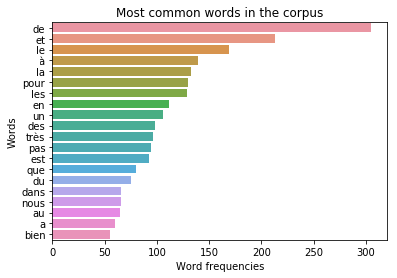

8546


In [56]:
# Making a first plot with original data
all_words = []
for review in all_reviews:
    for word in review.split():
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))

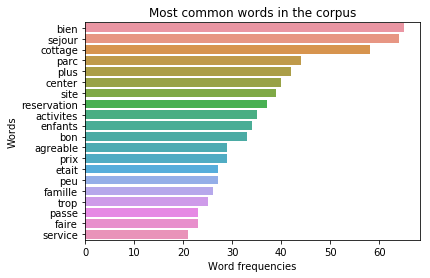

4818


In [61]:
# And making it with our current data
all_words = []
for review in stopword_reviews:
    for word in review:
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))



...Much better ! Isn't it ?

# TO DO : Now you can apply all of these methods to your own DataFrame


**The purpose is to create a second column with reviews content but processed and tokenized**

#### 1. Cleaning data :

In [66]:
df_perso.head()

,hotel_name,hotel_type,published_date,rating,review,review_language,reviewer_id,title,trip_date,trip_type
0,Center Parcs Le Bois aux Daims,LodgingBusiness,"October 4, 2018",5,"Thoroughly enjoyable time at Bois aux daims, e...",en,B2F94CE6E2F20A01493BC76C46F7CDB9,Yay!,September 2018,None
1,Center Parcs Le Bois aux Daims,LodgingBusiness,"October 1, 2018",3,"Nice place to relax, The park is quiet and gre...",en,4294D5DA68B56E9AFD34FC058E6F53B3,Relaxing stay with depressing food offering,September 2018,None
2,Center Parcs Le Bois aux Daims,LodgingBusiness,"October 4, 2018",4,we had a lovely long weekend and it was tough ...,en,DBBE91383F1387D6AFF8ABD6F5FDA904,long weekend,September 2018,None
3,Center Parcs Le Bois aux Daims,LodgingBusiness,"December 23, 2018",4,Can\u2019t complain except for the fact that t...,en,44482273FACD61FCD70CC8793A1345DC,Almost perfect!,December 2018,Traveled with family
4,Center Parcs Le Bois aux Daims,LodgingBusiness,"September 26, 2018",3,Plenty to do for amusement. Paying activities ...,en,59F1468A0F56AE011EED15990BE2B7D6,Super weekend,September 2018,None


In [67]:
# Deleting '\n' from content and name columns
clean_n = lambda x: ' '.join(x.split()).lower()

for col in ['hotel_name', 'review']:
    df_perso[col] = df_perso[col].apply(clean_n)

# Setting date as index
df_perso.set_index('published_date', inplace = True)

#  Displaying result
df_perso.head()

,hotel_name,hotel_type,rating,review,review_language,reviewer_id,title,trip_date,trip_type
published_date,,,,,,,,,
"October 4, 2018",center parcs le bois aux daims,LodgingBusiness,5,"thoroughly enjoyable time at bois aux daims, e...",en,B2F94CE6E2F20A01493BC76C46F7CDB9,Yay!,September 2018,None
"October 1, 2018",center parcs le bois aux daims,LodgingBusiness,3,"nice place to relax, the park is quiet and gre...",en,4294D5DA68B56E9AFD34FC058E6F53B3,Relaxing stay with depressing food offering,September 2018,None
"October 4, 2018",center parcs le bois aux daims,LodgingBusiness,4,we had a lovely long weekend and it was tough ...,en,DBBE91383F1387D6AFF8ABD6F5FDA904,long weekend,September 2018,None
"December 23, 2018",center parcs le bois aux daims,LodgingBusiness,4,can\u2019t complain except for the fact that t...,en,44482273FACD61FCD70CC8793A1345DC,Almost perfect!,December 2018,Traveled with family
"September 26, 2018",center parcs le bois aux daims,LodgingBusiness,3,plenty to do for amusement. paying activities ...,en,59F1468A0F56AE011EED15990BE2B7D6,Super weekend,September 2018,None


#### 2. Small EDA

- first look :

In [68]:
df_perso.info()
df_perso.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, October 4, 2018 to May 20, 2018
Data columns (total 9 columns):
hotel_name         40 non-null object
hotel_type         40 non-null object
rating             40 non-null int64
review             40 non-null object
review_language    40 non-null object
reviewer_id        40 non-null object
title              40 non-null object
trip_date          40 non-null object
trip_type          16 non-null object
dtypes: int64(1), object(8)
memory usage: 3.1+ KB


,rating
count,40.000000
mean,3.575000
std,1.106797
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


- looking for doubles :

In [71]:
print('Number of comments', df_perso.hotel_name.count())
print('Number of unique names: ', df_perso.hotel_name.nunique())

double = df_perso.hotel_name.value_counts().index.tolist()[:sum(df_perso.hotel_name.value_counts()>=2)]
print(double)
for name in double:
    print('\n',name)
    date_double = df_perso[df_perso.hotel_name==name].published_date.tolist()
    row_double = df_perso[df_perso.hotel_name==name].index.tolist()
    content_double = df_perso[df_perso.name==name].review.tolist()
    [print(date,row,content) for date,row,content in zip(date_double,row_double,content_double)]

Number of comments 40
Number of unique names:  1
['center parcs le bois aux daims']

 center parcs le bois aux daims


AttributeError: 'DataFrame' object has no attribute 'date'

- Global rating overview :

In [ ]:
# Average rating value
print('Average rating is : {}'.format(round(df.stars.mean(),2)))

# Plotting rating distribution
X_ratings = df_perso.stars.value_counts()
ax = sns.barplot(X_ratings.index,X_ratings,alpha=0.8)
ax.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(df.shape[0]))
plt.show()

- Overall length of reviews :

In [ ]:
# Making the plot
x = plt.figure(figsize=(12,5))
sns.distplot(df['content'].apply(len))
plt.title('Characters distributions')
plt.xticks(range(0,2000,250))
plt.show()

#### 3. 1st pre-processing(punctuation and specific characters)

In [ ]:
all_reviews = df_perso.content.tolist()
# transformating comments into lower-case text 
lower_reviews = [review.lower() for review in all_reviews]

# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [review.translate(str.maketrans(transformation_dict)) for review in lower_reviews]

# removing accent
with_accent = ['é', 'è', 'à']
without_accent = ['e', 'e', 'a']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_reviews]

which yields the following results :

In [ ]:
def number_of_unique_words(list_of_reviews):
  
    # Concatenating all reviews from the list
    all_words = ''.join(list_of_reviews)

    # Tokenizing
    unique_tokens = set(word_tokenize(all_words))
  
    # Returning length of list
    return len(unique_tokens)


print(number_of_unique_words(no_accent_reviews))

#### 4. 2nd pre-processing(tokenizing)

In [ ]:
tokenized_reviews_nltk = [word_tokenize(review) for review in no_accent_reviews]
tokenized_reviews = tokenized_reviews_nltk

#### 5. 3rd pre-processing(stopwords)

In [ ]:
stopW = stopwords.words('french')
stopW += ['les', 'a', 'tout','et','d','un','l','la','le','m','je','me','il','elle','on','nous','vous','hui','celui','celle','cette','ce','ils','ou','tres']
stopword_reviews = [[token for token in review if token not in stopW] for review in tokenized_reviews]

#### 6. And here's our results !

In [ ]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()
    
all_words = []
for review in stopword_reviews:
    for word in review:
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))

# BONUS : A little exercice about RegEx

**Try some patterns on the next strings**

You can use the different functions
- re.split() : to split my_string on the pattern and print the result.
- re.findall() : find all the occurences matching the pattern in the total string.

In [ ]:
import re
my_string = "Let's write RegEx!"

PATTERN = r"\s+"
# PATTERN = r"[a-z]"
# PATTERN = r"\w"
# PATTERN = r"\w+"

In [ ]:
re.findall(PATTERN, my_string)

In [ ]:
re.split(PATTERN, my_string)

**Given the table show in course, try to make the following match**

In [ ]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[a-zA-Z\s]+\."

# Split my_string on sentence endings and print the result
print(re.____(____, ____))

In [ ]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.____(____, ____))

In [ ]:
# Split my_string on spaces and print the result
spaces = r"[\w]+\s"
print(re.____(____, ____))

In [ ]:
# Find all digits in my_string and print the result
digits = r"[\W]+"
print(re.____(____, ____))